# Feature reduction and data grouping.

This notebook is based on the '2017 Mental health in Tech survey', provided by OSMI.
This dataset can be accessed here: https://www.kaggle.com/datasets/osmihelp/osmi-mental-health-in-tech-survey-2017

The goal of this notebook is to apply Feature reduction on our dataset, and then find Groups within our dataset using Clustering algorithms.

The flow of this notebook is as follows:
- We start with some Data processing.
- Then we will do some Data cleaning.
- Followed by Feature engineering.
- We will move on to Feature reduction.
- As well as Clustering our dataset using unsupervised learning techniques.
- We finish this notebook by visually exploring these groups/clusters that we have formed in the previous step.

First, let's start by importing the necessary libraries that we need

In [201]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import prince
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from kmodes.kmodes import KModes

Now we can read in the data.

In [202]:
data = pd.read_csv('2017.csv')

To be able to view all of the data, we set the following options:

In [203]:
pd.set_option('display.max_columns',None)
pd.set_option('max_rows',None)

Now we can start to take a look at our data.

In [204]:
data.shape

(756, 123)

In [205]:
#Percentage of missing values in dataframe
data.isna().sum().sum() / (756 * 123)

0.5014733083838775

In [206]:
data.head(1)

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",<strong>Do you have previous employers?</strong>,Was your employer primarily a tech company/organization?,<strong>Have your previous employers provided mental health benefits?</strong>,<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address yo

As we can see, we have a lot of columns. So let's view the percentage of missing values each one of these columns have.

In [207]:
a = data.isna().sum()
print((100*(a/len(data))))

#                                                                                                                                                                                                                                            0.000000
<strong>Are you self-employed?</strong>                                                                                                                                                                                                      0.000000
How many employees does your company or organization have?                                                                                                                                                                                  14.947090
Is your employer primarily a tech company/organization?                                                                                                                                                                                     14.947090
Is your primary 

Here we can see that we have a lot of columns with more than 90% missing values.
<br>Most of which looks quite unimportant.
<br>So, we are going to filter the dataset to include only the columns with less than 90% missing values.

In [208]:
#Create filter
max_na = (0.9 * len(data))
max_na

680.4

In [209]:
#Filter dataset
data = data.loc[:,(data.isnull().sum(axis=0) <= max_na)]

In [210]:
#View the shape of our 'new' dataframe
data.shape

(756, 84)

Okay, now our dataset has been trimmed, let's look at our columns that we have.

In [211]:
data.columns.to_list()

['#',
 '<strong>Are you self-employed?</strong>',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'Would you feel more comforta

# Important
Since the goal of this notebook is on 'Mental health in Technology related jobs', it is important that we stick to it.
<br>Here we only care about those individuals who actually have a Tech related job. 
<br>Therefore we will be removing columns that does not add to our goal.

In [212]:
data.drop(columns=['#',
                 'Do you know the options for mental health care available under your employer-provided health coverage?',
                 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                 'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
                 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                 'Have you ever discussed your mental health with your employer?',
                 'Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.',
                 'Would you feel comfortable discussing a mental health issue with your coworkers?',
                 'Have you ever discussed your mental health with coworkers?',
                 'Describe the conversation with coworkers you had about your mental health including their reactions.',
                 "Have you ever had a coworker discuss their or another coworker's mental health with you?",
                 'Describe the conversation your coworker had with you about their mental health (please do not use names).',
                 'Overall, how much importance does your employer place on physical health?',
                 'Overall, how much importance does your employer place on mental health?',
                 'Do you know local or online resources to seek help for a mental health issue?',
                 '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>',
                 '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>',
                 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                 'Do you believe your productivity is ever affected by a mental health issue?',
                 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
                 '<strong>Do you have previous employers?</strong>',
                 'Was your employer primarily a tech company/organization?',
                 '<strong>Have your previous employers provided mental health benefits?</strong>',
                 '<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>',
                 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
                 'Did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
                 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
                 'Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
                 'Would you have been willing to discuss your mental health with your direct supervisor(s)?',
                 'Did you ever discuss your mental health with your previous employer?',
                 'Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.',
                 '<strong>Would you have been willing to discuss your mental health with your coworkers at previous employers?</strong>',
                 'Did you ever discuss your mental health with a previous coworker(s)?',
                 'Describe the conversation you had with your previous coworkers about your mental health including their reactions.',
                 "Did you ever have a previous coworker discuss their or another coworker's mental health with you?",
                 'Describe the conversation your coworker had with you about their mental health (please do not use names)..1',
                 'Overall, how much importance did your previous employer place on physical health?',
                 'Overall, how much importance did your previous employer place on mental health?',
                 'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
                 'Mood Disorder (Depression, Bipolar Disorder, etc).1',
                 'Anxiety Disorder (Generalized, Social, Phobia, etc).2',
                 'Mood Disorder (Depression, Bipolar Disorder, etc).2',
                   'Have you had a mental health disorder in the past?',
                 'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when being treated effectively?</strong>',
                 'If you have a mental health disorder, how often do you feel that it interferes with your work <strong>when <em>NOT</em> being treated effectively (i.e., when you are experiencing symptoms)?</strong>',
                 'Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
                 'How willing would you be to share with friends and family that you have a mental illness?',
                 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                 'Why or why not?',
                 'Would you bring up your mental health with a potential employer in an interview?',
                 'Why or why not?.1',
                 'Are you openly identified at work as a person with a mental health issue?',
                 'Has being identified as a person with a mental health issue affected your career?',
                 'If they knew you suffered from a mental health disorder,\xa0how do you think that team members/co-workers would react?',
                 '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
                 'Describe the circumstances of the badly handled or unsupportive response.',
                 '<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>',
                 'Overall, how well do you think the tech industry supports employees with mental health issues?',
                 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.',
                 'If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.',
                 'Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used <em>anonymously</em>\xa0and only with your permission.)',
                 'What US state or territory do you <strong>live</strong> in?',
                 'What is your race?',
                 'What US state or territory do you <strong>work</strong> in?',
                 'Start Date (UTC)',
                 'Submit Date (UTC)',
                 'Network ID'
], inplace=True , axis=1)

Let's see if it worked.

In [213]:
data.shape

(756, 15)

Look's like it worked!
<br>We can now go ahead and rename these columns

In [214]:
data.columns = ['Self-employed?', 'Num. Employees', 'Tech company?',
               'Tech related role?', 'M-H benefits?','Workplace Discussion?','Medical Coverage?', 
                'Current illness', 'Previously diagnosed?','Sought help?', 
                'Illness history?', 'Age', 'Gender', 'Live Country',
                   'Work Country']

Now we can move on and start working with the missing values.
<br>We start by counting the amount of missing values in each column

In [215]:
data.isna().sum().sort_values()

Self-employed?             0
Current illness            0
Sought help?               0
Illness history?           0
Age                        2
Live Country               2
Work Country               2
Gender                    13
Num. Employees           113
Tech company?            113
Tech related role?       113
M-H benefits?            113
Workplace Discussion?    113
Previously diagnosed?    432
Medical Coverage?        643
dtype: int64

OOPS! Look's like our important column 'Tech related role?' has some missing values.
<br>And we are only interested in those which actually have Tech related roles.
<br>Since this column is of vital importance, imputing these mising values will not be okay.
<br>Therefore, our only option is to get rid of all the rows which has missing values in the 'Tech related role?' column

In [216]:
#Filter out data based on 'Na' values in the 'Tech related role?' column.
data = data[data['Tech related role?'].notna()]
data.isna().sum().sort_values()

Self-employed?             0
Num. Employees             0
Tech company?              0
Tech related role?         0
M-H benefits?              0
Workplace Discussion?      0
Current illness            0
Sought help?               0
Illness history?           0
Age                        0
Live Country               0
Work Country               0
Gender                     6
Previously diagnosed?    368
Medical Coverage?        643
dtype: int64

That removed 113 rows from our data, but we still have 643 rows left, no big deal.
<br>As mentioned earlier, we only care about those who have a Tech related job.
<br>So let's see the values in that column.

In [217]:
data['Tech related role?'].value_counts()

1.0    595
0.0     48
Name: Tech related role?, dtype: int64

We have some insignificant answers in our dataset.
<br>We only care about those who have a Tech related job, therefore we will drop the rows of those who does not have a Tech related role.

In [218]:
data.drop(data[data['Tech related role?'] == 0.0].index, inplace=True)

Now our dataframe only consists of data from individuals with tech related roles.
<br>Thereforewe can now actually drop this column.

In [219]:
data.drop(columns='Tech related role?',inplace=True)

Now we can move on, knowing we have the correct data to work on.
<br>Let's handle our gender column.
<br><br>Since we only have 6 missing values, rather than deleting these entries, I will classify them as 'Other'

In [220]:
data['Gender'] = data['Gender'].fillna('Other')

Let's take a quick look at our value counts from our gender column.
<br>To make it easier, I will transform all of the entries to lowercase, and strip unnecessary whitespaces.

In [222]:
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Gender'].value_counts()

male                           357
female                         130
m                               38
f                               22
woman                            5
man                              4
nonbinary                        4
other                            4
cis male                         3
female (cis)                     2
mail                             1
sometimes                        1
none                             1
transfeminine                    1
\-                               1
f, cisgender                     1
cis female                       1
cis-female                       1
genderqueer/non-binary           1
genderqueer demigirl             1
non binary                       1
contextual                       1
female (cisgender)               1
male-ish                         1
cis-male                         1
agender/genderfluid              1
non-binary                       1
my sex is female.                1
genderfluid         

Wow! Interesting.
<br>For this notebook, I will split the genders into three columns, Male, Female and Other.
<br>Done as follows:
- First, I will create 3 lists, one for Male, Female, Other.
- Then, I will classify the values from above into each category/list.
- And replace all of these values with a simple M,F,O into our dataframe.

In [114]:
#Create the 3 lists
Male = ['male','m','man','cis male','mail','male-ish','cis-male','male (cis)','cis hetero male','dude']

Female = ['female','f','woman','female (cis)','f, cisgender','cis female','cis-female','genderqueer demigirl',
          'female (cisgender)','my sex is female.','femail','femalw']

Other = ['nonbinary','other','sometimes','none','transfeminine','\-','genderqueer/non-binary','non binary','contextual',
         'agender/genderfluid','non-binary','genderfluid','god king of the valajar','uhhhhhhhhh fem genderqueer?']

In [115]:
#Transform the results into a simple format
data['Gender'] = data['Gender'].replace(Male,'M')
data['Gender'] = data['Gender'].replace(Female,'F')
data['Gender'] = data['Gender'].replace(Other,'O')

In [116]:
data['Gender'].value_counts()

M    408
F    167
O     20
Name: Gender, dtype: int64

### Hooray, that worked!

Let's take a look at all of the unique values that we have in our 'M-H benefits' column.

In [117]:
data['M-H benefits?'].value_counts()

Yes                               327
I don't know                      158
No                                 88
Not eligible for coverage / NA     22
Name: M-H benefits?, dtype: int64

Look's like we have a redundant entry type, 'Not eligible for coverage / NA' is the same as 'No'. 
<br>Therefore we can change these entries to a 'No' value.

In [118]:
data.loc[data['M-H benefits?']=='Not eligible for coverage / NA' , 'M-H benefits?'] = 'No'

On to 'Previously diagnosed?' column.
<br>Here we have 368 missing values. That's 61.85%.
<br>We'll start with looking at the value counts again

In [119]:
data['Previously diagnosed?'].value_counts()

Yes    247
No       6
Name: Previously diagnosed?, dtype: int64

Since we have a lot of missing values, more than answers, I do not think that we can assign these unanswered rows to just a 'Yes' or 'No'.
<br>It would be safer to create another value, 'Unspecified' and work from there.

In [120]:
data['Previously diagnosed?'].fillna('Unspecified', inplace=True)

Look's like everything is fine.
<br>Let's look at the missing values from our dataframe again.

In [121]:
a = 100 * (data.isna().sum()) / len(data)
print( 'Percentage of missing values for each column is\n')
a

Percentage of missing values for each column is



Self-employed?             0.0
Num. Employees             0.0
Tech company?              0.0
M-H benefits?              0.0
Workplace Discussion?      0.0
Medical Coverage?        100.0
Current illness            0.0
Previously diagnosed?      0.0
Sought help?               0.0
Illness history?           0.0
Age                        0.0
Gender                     0.0
Live Country               0.0
Work Country               0.0
dtype: float64

As we can see, we now only have one last column, 'Medical Coverage?' left to deal with.
<br>Unfortunately for us, we are missing 100% of the values
<br>Luckily for us, we can fix this.
- First, we look at whether or not the column, 'M-H benefits?', which is provided by the company has a 'Yes' answer or not.
<br> Around 78% of US companies offer Medical health benefits, which includes those for mental health. Therefore, if the entry, or row, has a 'Yes' in the 'M-H benefits?' column, we will set their 'Medical coverage?' column, to 'Yes'.
<br>This is done as follows:

In [122]:
data.loc[data['M-H benefits?']=='Yes', 'Medical Coverage?'] = 'Yes'

<br>According to 'OECD-ilibrary.org' , in the year of 2017, The United Kingdom, reportedly, had a perfect 100% of it's residents registered to a Medical health provider, either Public or Private, which includes Mental health coverage.
<br>According to BBC, in the UK, healthcare is univeral and paid for by 18% tax of a citizen's income.
<br>Therefore, we can change all ot the 'Medical Coverage?' column values to 'Yes', if they live in The United Kingdom.

In [123]:
data.loc[data['Live Country']=='United Kingdom', 'Medical Coverage?'] = 'Yes'

According to 'OECD-ilibrary.org', in the year of 2017, The United States of America, had a reported 90% of individuals registered to health care, which includes Mental health coverage.
<br>So, I will impute this dataset to have 90% of people living in the USA, from our specific dataset, to have medical coverage.
- I will start by getting the amount of people living in the USA from this survey as follows:

In [124]:
US_total = data.loc[data['Live Country']=='United States of America']
print('Amount of USA residents :{}'.format(len(US_total)))

Amount of USA residents :416


- Now I will get the amount of USA residents that does not yet have medical coverage provided by their employer

In [125]:
US_nan = data.loc[(data['Medical Coverage?'].isna()) & (data['Live Country']=='United States of America')]
print('Amount of USA residents without Medical coverage provided by their employer :{}'.format(len(US_nan)))

#Percentage of uninsured
Uninsured = round(100*((len(US_nan)) / (len(US_total))), 2)

print('This is ' + str(Uninsured) + '%')

Amount of USA residents without Medical coverage provided by their employer :133
This is 31.97%


31.97% is maybe too high, and should be around 10%.
<br>So, now I will draw random samples from the 31.97% of NaN values, and set them to 'Yes'.
<br>The goal of this, is to have around 10% of USA residents to not have health care.
<br><br>Since we have a total of 416 US residents, we will make 42 (10.09%) to have No.
<br>Then I will set the rest to 'Yes'

In [126]:
Nan_list = list(US_nan.index)
Random_samples = random.sample(Nan_list,42)
(Random_samples.sort())

Now that we have our random sample, we will set these random entries equal to 'No' in the 'Medical Coverage?' column.

In [127]:
data.at[Random_samples , 'Medical Coverage?'] = 'No'

Now, all of the other values inside our column 'Medical Coverage?' of individuals from the USA has to be set to yes.

In [128]:
data.loc[(data['Live Country']=='United States of America') & (data['Medical Coverage?'].isna()) , 'Medical Coverage?'] = 'Yes'

Great, now 90% of USA individuals have Medical insurance.
<br>Let's see how many null values we have left.

In [129]:
data['Medical Coverage?'].isna().sum()

99

Interestingly, that is quite a lot. In order to understand these missing values, let's look at the different country counts we have in our dataset.

In [130]:
data['Live Country'].value_counts()

United States of America    416
United Kingdom               47
Germany                      16
France                       14
Canada                       14
Spain                        12
Netherlands                  10
India                         8
Australia                     7
Switzerland                   5
Romania                       4
South Africa                  3
New Zealand                   3
Mexico                        3
Japan                         3
Portugal                      2
Sweden                        2
Russia                        2
Hungary                       2
Ireland                       2
Argentina                     2
Bulgaria                      2
Singapore                     1
Belgium                       1
Slovakia                      1
Poland                        1
Ukraine                       1
Austria                       1
Bangladesh                    1
Greece                        1
Italy                         1
Israel  

As we can see there is quite a lot. Once again we will make use of the 'OECD-ilibrary.org' data, to fill in some of these missing data. 
<br>The following countries have a 100% record for individuals with health care,

Germany                      
Canada                       
France                       
Spain                        
Netherlands

Therefore, we will change the column 'Medical Coverage?' accordingly.

<br>This source can be found here:
<br>https://www.oecd-ilibrary.org/sites/health_glance-2017-24-en/index.html?itemId=/content/component/health_glance-2017-24-en

In [131]:
data.loc[(data['Live Country']=='Germany') | (data['Live Country']=='France') | (data['Live Country']=='Canada') |
         (data['Live Country']=='Spain') | (data['Live Country']=='Netherlands')
         , 'Medical Coverage?'] = 'Yes'

If we now take a look at the amount of missing values left, we will see that there is 55 missing values or 9.24%.
<br>This is not a lot, and will therefore be dropped.

In [132]:
data['Medical Coverage?'].isna().sum()

55

In [133]:
data.dropna(inplace=True)

Our dataframe now looks like this:

In [134]:
data.head()

,Self-employed?,Num. Employees,Tech company?,M-H benefits?,Workplace Discussion?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
0,0,100-500,1.0,No,No,Yes,Possibly,Unspecified,1,No,27.0,F,United Kingdom,United Kingdom
1,0,100-500,1.0,Yes,No,Yes,Possibly,Unspecified,0,No,31.0,M,United Kingdom,United Kingdom
2,0,6-25,1.0,I don't know,I don't know,Yes,Yes,Yes,1,Yes,36.0,M,United States of America,United States of America
3,0,More than 1000,1.0,Yes,I don't know,Yes,Yes,Yes,1,I don't know,22.0,M,United States of America,United States of America
6,0,6-25,1.0,Yes,No,Yes,Yes,Yes,1,Yes,36.0,F,United States of America,United States of America


### Feature engineering
Lastly, we need to do some feature engineering.
- Self-employed values have to change from 0/1 to No/Yes
- Tech company? values have to change from 0.0/1.0 to No/Yes
- Sought help? values have to change from 0/1 to No/Yes
- Age will also change from each respective value in designated bins/categories, named G1 - G9 (so we have 5-year age groups)

In [135]:
data['Self-employed?'] = data['Self-employed?'].replace({1 : 'Yes' , 0 : 'No'})

In [136]:
data['Tech company?'] = data['Tech company?'].replace({1.0 : 'Yes' , 0.0 : 'No'})

In [137]:
data['Sought help?'] = data['Sought help?'].replace({1 : 'Yes' , 0 : 'No'})

In [138]:
data['Age'].describe()

count    540.000000
mean      34.877778
std        7.896587
min       20.000000
25%       29.000000
50%       34.000000
75%       40.000000
max       66.000000
Name: Age, dtype: float64

In [139]:
age_min = data['Age'].min()
age_max = data['Age'].max()

bins = np.linspace(age_min, age_max, 10)
labels = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
bins

array([20.        , 25.11111111, 30.22222222, 35.33333333, 40.44444444,
       45.55555556, 50.66666667, 55.77777778, 60.88888889, 66.        ])

In [140]:
data['Age'] = pd.cut(x=data['Age'], bins=bins, labels=labels, include_lowest=True)

One last thing to do, is to convert all of these columns into the Category type.
<br>By doing this, we will make it easier to do feature reduction next.

In [141]:
column_names = list(data.columns)

In [142]:
for col in column_names:
    data[col] = data[col].astype('category')

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 754
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Self-employed?         540 non-null    category
 1   Num. Employees         540 non-null    category
 2   Tech company?          540 non-null    category
 3   M-H benefits?          540 non-null    category
 4   Workplace Discussion?  540 non-null    category
 5   Medical Coverage?      540 non-null    category
 6   Current illness        540 non-null    category
 7   Previously diagnosed?  540 non-null    category
 8   Sought help?           540 non-null    category
 9   Illness history?       540 non-null    category
 10  Age                    540 non-null    category
 11  Gender                 540 non-null    category
 12  Live Country           540 non-null    category
 13  Work Country           540 non-null    category
dtypes: category(14)
memory usage: 14.8 KB


Another step that we can do, is to check the amount of different values in each column, and see if we can reduce this dataset even further.

In [144]:
data.nunique()

Self-employed?            1
Num. Employees            6
Tech company?             2
M-H benefits?             3
Workplace Discussion?     3
Medical Coverage?         2
Current illness           4
Previously diagnosed?     3
Sought help?              2
Illness history?          3
Age                       9
Gender                    3
Live Country             15
Work Country             15
dtype: int64

Cool. As we can see, our column 'Self-employed' only has one unique value. Let's see what it is:

In [145]:
data['Self-employed?'].unique()

['No']
Categories (1, object): ['No']

Look's like our column only contains 'No', meaning that everyone who answered this survey is not self-employed.
<br>We will go ahead and drop this column now.

In [146]:
data.drop(columns='Self-employed?', inplace=True)

### Hooray
We are now done with our data transformation and feature engineering.

<AxesSubplot:title={'center':'Distribution of different age groups'}, xlabel='Age groups', ylabel='Number of individuals'>

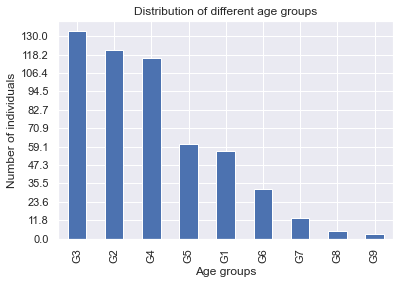

In [147]:
data['Age'].value_counts().plot(kind='bar',xlabel='Age groups',ylabel='Number of individuals', 
                                title='Distribution of different age groups', yticks=np.linspace(0,130,12))

## Feature reduction

For feature reduction on categorical variables/columns, we will be using 'Multiple Correspondence Analysis'.

Multiple correspondence analysis is a multivariate data analysis and data mining tool concerned with interrelationships amongst categorical features. For categorical feature selection, the scikit-learn library offers a selectKBest class to select the best k-number of features using chi-squared stats (chi2). - https://datascienceplus.com/selecting-categorical-features-in-customer-attrition-prediction-using-python/

To be able to implement MCA very easily, we will make use of the 'Prince' library.
More information here: https://github.com/MaxHalford/prince

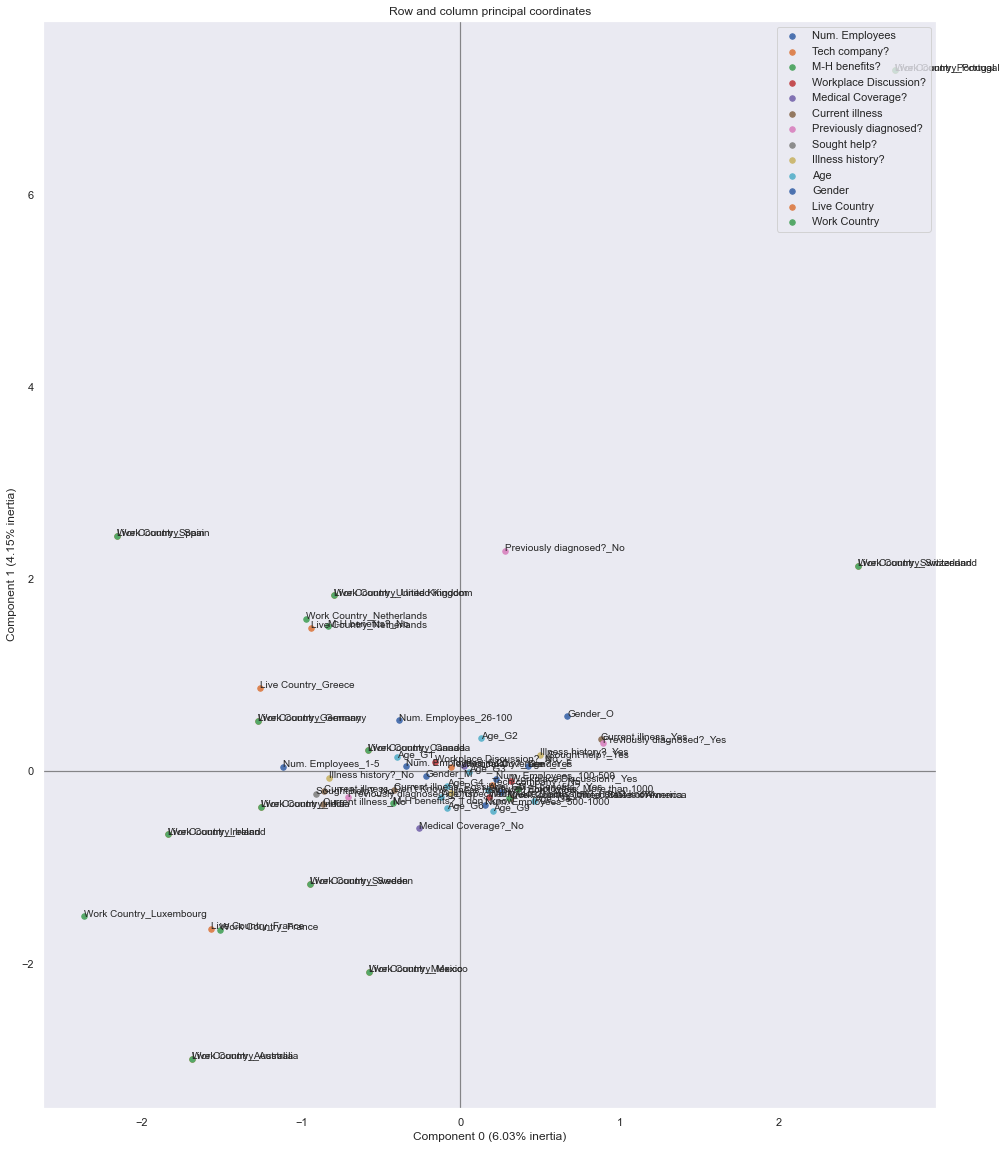

In [148]:
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

illness_mca = mca.fit(data)

ax = illness_mca.plot_coordinates(
    X=data,
    ax=None,
    figsize=(16,20),
    show_row_points=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
).legend(loc='upper right')

## Important
### What does this graph mean/show?
Although it is hard to see in this graph above, when we look at the coordinates (-1,0.2), we can see a brown dot. This brown dot is whether or not someone currently has a mental illness or not.

What about the other dots?

Well, we can look at the dots that are the closest to our brown dot, and indentify them individually. These dots, which are actually columns from our dataframe, are the heavily influencial to our column, whether someone has a current Mental illness or not.

Simply put, the closer other dots, or columns, to our column/dot of interest, the bigger impact they have on predicting that column.

### Next we will use the chi2 test to see the best column entries that helps us to predict whether someone has mental illness or not.

Note, we will only see each of the different feature values, not the features themselves.

Before you can employ selectKBest in the scikit-learn library, you need to coerce categorical features into indicator variables (dummy variables).

In [149]:
data2 = pd.get_dummies(data, drop_first=True)

Let's see what our dataframe structure is, and what columns we now have.

In [150]:
print(data2.shape)
data2.columns

(540, 57)


Index(['Num. Employees_100-500', 'Num. Employees_26-100',
       'Num. Employees_500-1000', 'Num. Employees_6-25',
       'Num. Employees_More than 1000', 'Tech company?_Yes',
       'M-H benefits?_No', 'M-H benefits?_Yes', 'Workplace Discussion?_No',
       'Workplace Discussion?_Yes', 'Medical Coverage?_Yes',
       'Current illness_No', 'Current illness_Possibly', 'Current illness_Yes',
       'Previously diagnosed?_Unspecified', 'Previously diagnosed?_Yes',
       'Sought help?_Yes', 'Illness history?_No', 'Illness history?_Yes',
       'Age_G2', 'Age_G3', 'Age_G4', 'Age_G5', 'Age_G6', 'Age_G7', 'Age_G8',
       'Age_G9', 'Gender_M', 'Gender_O', 'Live Country_Canada',
       'Live Country_France', 'Live Country_Germany', 'Live Country_Greece',
       'Live Country_India', 'Live Country_Ireland', 'Live Country_Mexico',
       'Live Country_Netherlands', 'Live Country_Portugal',
       'Live Country_Spain', 'Live Country_Sweden', 'Live Country_Switzerland',
       'Live Country_Unite

Next, we identify our input features that we want to reduce and keep our target variable, also known as our predictor, to the side.

In [151]:
X = data2.drop('Current illness_Yes', axis=1)
y = data2['Current illness_Yes']

We are now ready to run our Selection process. We use the 'SelectKBest' option, using our chi2 scores.

In [152]:
#Categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Num. Employees_100-500: 1.843636
 Num. Employees_26-100: 4.904327
 Num. Employees_500-1000: 0.192045
 Num. Employees_6-25: 0.466418
 Num. Employees_More than 1000: 1.800000
 Tech company?_Yes: 0.559806
 M-H benefits?_No: 0.372535
 M-H benefits?_Yes: 8.159174
 Workplace Discussion?_No: 0.444853
 Workplace Discussion?_Yes: 0.750000
 Medical Coverage?_Yes: 0.478012
 Current illness_No: 120.800000
 Current illness_Possibly: 84.800000
 Previously diagnosed?_Unspecified: 240.000000
 Previously diagnosed?_Yes: 293.750000
 Sought help?_Yes: 81.246291
 Illness history?_No: 38.503125
 Illness history?_Yes: 36.907283
 Age_G2: 0.912810
 Age_G3: 1.056015
 Age_G4: 1.077586
 Age_G5: 0.236885
 Age_G6: 1.314062
 Age_G7: 0.188462
 Age_G8: 0.040000
 Age_G9: 0.600000
 Gender_M: 4.352198
 Gender_O: 2.025000
 Live Country_Canada: 1.428571
 Live Country_France: 7.889286
 Live Country_Germany: 2.450000
 Live Country_Greece: 0.800000
 Live Country_India: 1.600000
 Live Country_Ireland: 0.800000
 Live Country_

The way to interpret the above chi2 scores is that categorical features with the highest values for the chi-squared stat indicate higher relevance and importance in predicting individual mental health illness and may be included in a predictive model development.

To interpret these results easier, we can plot them in a decending order.

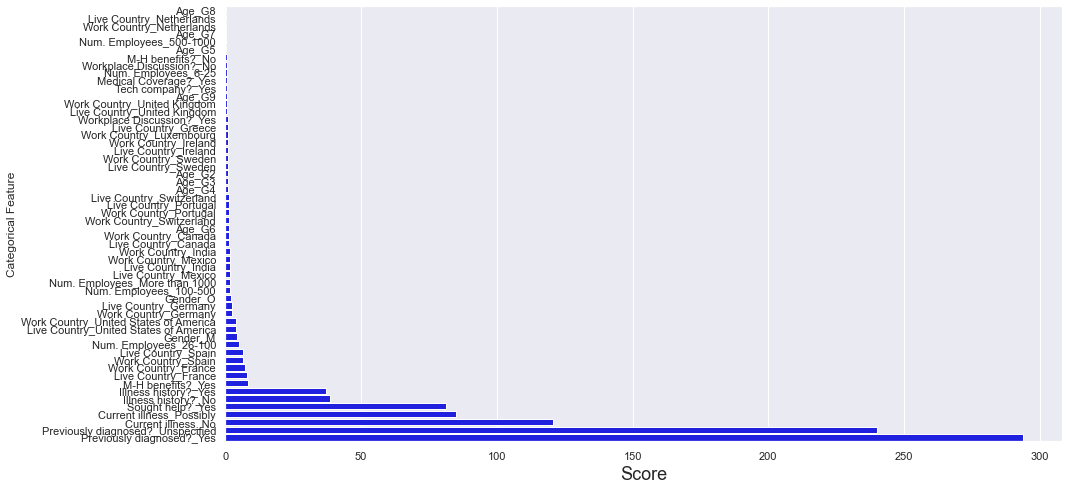

In [153]:
#Plot scores
datset = pd.DataFrame()
datset['feature'] = X.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=datset['scores'], y=datset['feature'], color='blue')
#Set style attributes
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.show()

### Now we will select the best features, as a whole.

Before we looked at the column values, and how they effect our column, 'Current Illness'.

Now we will be using the 'OrdinalEncoder()' and 'LabelEncoder()' methods to select the best features.

We start again by seperating our target variable from the rest of our features.

In [154]:
X1 = data.drop('Current illness', axis=1)
y1 = data['Current illness']

In [155]:
#Prepare input features
#Ordinal Encoder is used to encode the input
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

#Prepare target variable
#Label encoder is used to encode the output, or target variable, 
#  in this case if the entry individual has a current mental illness or not
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

### What does the X_enc and y_enc represent?

This is our encoded variables. Each column has different values, such as 'Yes' or 'No'. Here we encoded each different entry in a column into a number, like, 0 or 1 ect.
<br>The same is done with our target variable, whether a person curently has a mental illness or not. For example, if someone currently has a mental illness, then they are given the value 1, if not, they are given the value 0.

In [156]:
#We can view the shape of this data and take a look at how they are encoded.
print(X_enc.shape)
X_enc

(540, 12)


array([[ 1.,  1.,  1., ...,  0., 13., 13.],
       [ 1.,  1.,  2., ...,  1., 13., 13.],
       [ 4.,  1.,  0., ...,  1., 14., 14.],
       ...,
       [ 2.,  1.,  0., ...,  1., 13., 13.],
       [ 4.,  1.,  2., ...,  1., 14., 14.],
       [ 2.,  1.,  2., ...,  1., 14., 14.]])

In [157]:
#We can view the shape of this data and take a look at how they are encoded.
print(y_enc.shape)
y_enc

(540,)


array([2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 0, 2, 1, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 2,
       1, 3, 3, 1, 2, 2, 0, 3, 2, 3, 3, 1, 2, 0, 3, 1, 3, 3, 0, 2, 1, 3,
       3, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2,
       2, 2, 0, 3, 2, 2, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 0, 3, 1, 3, 3,
       1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 3, 3, 3, 3, 3, 2, 0, 3, 3,
       0, 2, 1, 2, 2, 3, 2, 1, 2, 3, 3, 1, 0, 1, 3, 2, 1, 1, 3, 1, 3, 3,
       2, 3, 3, 0, 2, 3, 1, 1, 3, 1, 2, 2, 3, 3, 1, 0, 3, 2, 3, 3, 3, 1,
       3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1,
       2, 1, 3, 3, 2, 1, 2, 2, 1, 3, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1,
       0, 3, 2, 1, 3, 3, 3, 0, 3, 1, 2, 0, 1, 2, 1, 3, 3, 1, 1, 0, 3, 3,
       1, 3, 0, 3, 2, 3, 3, 1, 0, 3, 2, 1, 1, 3, 2, 1, 3, 3, 2, 0, 1, 3,
       2, 1, 2, 2, 3, 2, 1, 3, 1, 2, 1, 2, 0, 1, 0,

### Selecting features (sf)

In [158]:
#Feature selection based on Chi-squared scores
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)

#Print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Num. Employees: 4.897886
 Tech company?: 0.633776
 M-H benefits?: 14.028933
 Workplace Discussion?: 0.105995
 Medical Coverage?: 0.484121
 Previously diagnosed?: 85.876623
 Sought help?: 89.988407
 Illness history?: 25.684165
 Age: 5.549643
 Gender: 1.984632
 Live Country: 22.601052
 Work Country: 21.831499


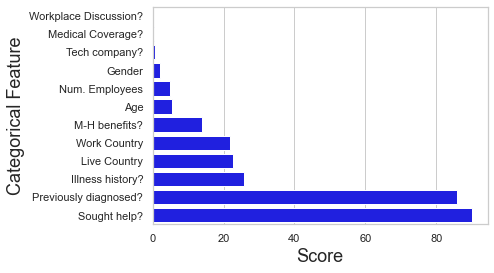

In [159]:
#Plot scores
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)

#Create barplot
sns.barplot(x=datset1['scores'], y=datset1['feature'], color='blue')
#Set style
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

The graph above represents the Chi-squared scores of each column respectively.
<br>The higher the score, the more important or relevant the feature.
<br>These scores also show which columns are most important in trying to predict whether someone might have mental illness or not.

It is clear that not all features have high scores for our dataset. Therefore we will be reducing the number of features by deleting those which are relatively unimportant.

In [160]:
#Drop unimportant columns.
data.drop(columns=['Workplace Discussion?','Medical Coverage?', 'Tech company?', 'Gender', 'Num. Employees', 'Age'],
          inplace=True)

## Clustering

When it comes to clustering categorical data, K-Modes is a fairly popular and easy algorithm to use.

KModes uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

For more information: https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1489.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1489.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 138, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

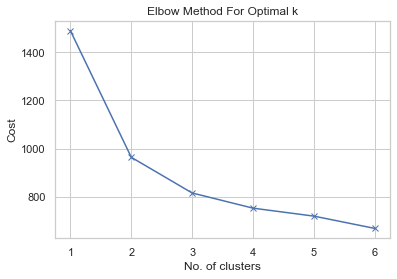

In [161]:
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see from the graph above, the elbow is formed at K=2 clusters. Therefore we will create a model with 2 clusters, since this is the optimal number.

In [162]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 151, cost: 980.0
Run 1, iteration: 2/100, moves: 17, cost: 980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 65, cost: 980.0
Run 2, iteration: 2/100, moves: 118, cost: 964.0
Run 2, iteration: 3/100, moves: 18, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 26, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 145, cost: 964.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 68, cost: 964.0
Best run was number 2


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

Now that we have our clusters, labelled as '0/1', we can insert it into our dataset. Now we will have a column that shows us exactly to which cluster each entry belongs.

In [163]:
data.insert(0, "Cluster", clusters, True)

If we now view our data, we can see what it looks like!

In [164]:
data.head()

,Cluster,M-H benefits?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Live Country,Work Country
0,1,No,Possibly,Unspecified,Yes,No,United Kingdom,United Kingdom
1,1,Yes,Possibly,Unspecified,No,No,United Kingdom,United Kingdom
2,0,I don't know,Yes,Yes,Yes,Yes,United States of America,United States of America
3,0,Yes,Yes,Yes,Yes,I don't know,United States of America,United States of America
6,0,Yes,Yes,Yes,Yes,Yes,United States of America,United States of America


# Visual Exploration
Visual representations that confirm the assignment of our clusters.

### Cluster Count
First, let's plot the total amount of entries in each cluster.

<AxesSubplot:title={'center':'Cluster Count'}, xlabel='Cluster Group', ylabel='Count'>

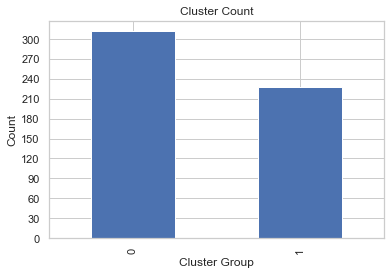

In [165]:
data['Cluster'].value_counts().plot.bar(xlabel='Cluster Group', ylabel='Count', yticks=np.arange(0,310,30), title='Cluster Count')

### Current illness
Seeing that our cluster groups are relatively similar in size, let's take a look at the total amount of different 'Current illness' answers and compare those from Cluster 0 with those of Cluster 1

We do this by first creating a new dataframe using 'groupby' to select the columns 'Cluster' and 'Current illness'.

In [166]:
ci_counts = (data.groupby('Cluster')['Current illness'].value_counts()).to_frame()

In [167]:
#View dataframe as is:
ci_counts

Current illness
Cluster                            
0       Yes                     240
        Possibly                 48
        No                       17
        Don't Know                7
1       No                      134
        Possibly                 58
        Don't Know               36
        Yes                       0

Now we quickly transform this dataframe into a more useable format.

In [168]:
#Reset dataframe index, so that we have 3 columns, and then rename those columns
ci_counts.reset_index(inplace=True)
ci_counts.rename(columns={'level_1':'Current illness', 'Current illness':'Counts'}, inplace=True)

In [169]:
#View what this dataframe now looks like.
ci_counts

,Cluster,Current illness,Counts
0,0,Yes,240
1,0,Possibly,48
2,0,No,17
3,0,Don't Know,7
4,1,No,134
5,1,Possibly,58
6,1,Don't Know,36
7,1,Yes,0


And finally we can plot this data using seaborn.

Text(0.5, 1.0, 'Indivuals which currently have a Mental Illness')

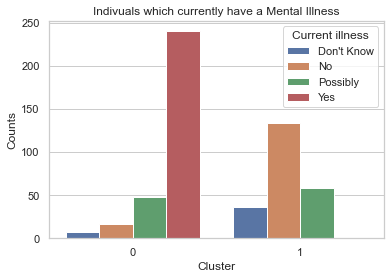

In [170]:
sns.barplot(x='Cluster', y='Counts', hue='Current illness', data=ci_counts).set_title('Indivuals which currently have a Mental Illness')

As we can see from the table 'ci_counts' above, it is clear that cluster 0 contains 100% of the 'No' values and only 0.83% of the 'Yes' values. Cluster 0 contains 77.36% (82/106) of the "Possibly" entries and also contains 97.67% of the "Don't know" entries.

Therefore it is safe to say that individuals in Cluster 1 has a much higher chance of having a mental illness as those in Cluster 0.

### Mental health benefits
With the column 'M-H benefits', we want to do the exact same as what we did with the 'Current illness' column.

In [171]:
mh_benefits = (data.groupby('Cluster')['M-H benefits?'].value_counts()).to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
mh_benefits.reset_index(inplace=True)
mh_benefits.rename(columns={'level_1':'M-H benefits', 'M-H benefits?':'Counts'}, inplace=True)

#View what this dataframe now looks like.
mh_benefits

,Cluster,M-H benefits,Counts
0,0,Yes,214
1,0,I don't know,61
2,0,No,37
3,1,Yes,113
4,1,I don't know,81
5,1,No,34


Once again we plot this data using seaborn.

Text(0.5, 1.0, 'Indivuals which have Mental Health benefits')

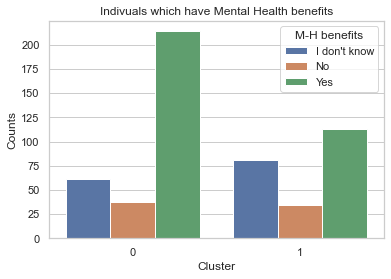

In [172]:
sns.barplot(x='Cluster', y='Counts', hue='M-H benefits', data=mh_benefits).set_title('Indivuals which have Mental Health benefits')

Although this bar chart looks very similar for both Clusters, it is still evident that individuals in Cluster 1 has a higher chance (70.72%) of having Mental health benefits provided for by their employee than the chances of individuals in Cluster 0 (50.9%) having Mental health benefits provided for by their employee.

WOW! These two graphs already provide us with some very interesting information. You might have thought that companies providing Mental health benefits to their employees would allow them to take care of it. Although, this is not the case, as employers providing Mental health benefits have actually more individuals with Mental health problems than individuals without mental health problems.

### Bar chart of 'Previously diagnosed?' ,	'Sought help?', and	'Illness history?'
We can now move a bit faster with our analysis and do the exact same as we did above for these columns as well.
<br>By now the code is a bit explanatory, se I will only stop when and discuss these results at the end.

### Previously diagnosed?

In [173]:
#For our first column 'Previously diagnosed?'
P_d = (data.groupby('Cluster')['Previously diagnosed?'].value_counts()).to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
P_d.reset_index(inplace=True)
P_d.rename(columns={'level_1':'Previously diagnosed?', 'Previously diagnosed?':'Counts'}, inplace=True)

#View what this dataframe now looks like.
P_d

,Cluster,Previously diagnosed?,Counts
0,0,Yes,235
1,0,Unspecified,72
2,0,No,5
3,1,Unspecified,228
4,1,No,0
5,1,Yes,0


Text(0.5, 1.0, 'Counts of individuals that has been Previously Diagnosed')

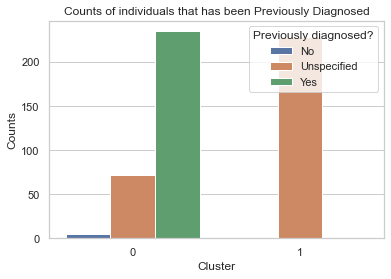

In [174]:
sns.barplot(x='Cluster', y='Counts', hue='Previously diagnosed?', data=P_d).set_title(
    'Counts of individuals that has been Previously Diagnosed')

This graph confirms that the individuals in Cluster 0 has been previously diagnosed with a Mental Illness. Compared to those individuals in Cluster 1, for which all individuals can not specify whther they have been previously diagnosed or not.

### Sought help?

In [175]:
#For our second column 'Sought help?'
S_h = (data.groupby('Cluster')['Sought help?'].value_counts()).to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
S_h.reset_index(inplace=True)
S_h.rename(columns={'level_1':'Sought help?', 'Sought help?':'Counts'}, inplace=True)

#View what this dataframe now looks like.
S_h

,Cluster,Sought help?,Counts
0,0,Yes,304
1,0,No,8
2,1,No,195
3,1,Yes,33


Text(0.5, 1.0, 'Counts of individuals that have sought help')

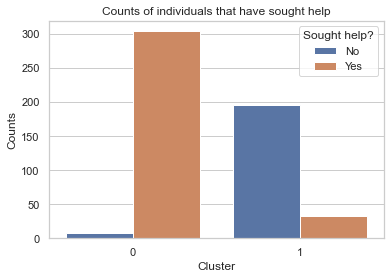

In [176]:
sns.barplot(x='Cluster', y='Counts', hue='Sought help?', data=S_h).set_title('Counts of individuals that have sought help')

This graph shows us some good news. Even though the majority of individuals in Cluster 0 currently has, or previously had a mental health disorder, we can see that 97.5% of the individuals in CLuster 0 has sought help.
<br>Interestingly, we see that the majority of individuals in Cluster 1, who are linked to not have a current mental illness, have not sought help. Although there is still individuals who have sought help.

When it comes to mental illness, seeking help must be a primary objective for all individuals. I think it is therefore important that we look at the amount of individuals who have a mental illness, and compare it to the amount of people who have sought help.

First we will get the amount of individuals who currently have a mental illness and who have not sought help.

In [177]:
No_help = data[(data['Current illness']=='Yes') & (data['Sought help?']=='No')]
len(No_help)

8

Now we will get the amount of people who have mental illness.

In [178]:
illness = data[data['Current illness']=='Yes']
len(illness)

240

As we can see we have a totall of 3% (8/240) of individuals who have been diagnosed with mental illness, but don't seek help.
<br>This might not seem like a lot, although it is still unacceptable in 2022. 

With all of the negative affects that a Mental Illness can have on any individual, there is no reason for anyone to not be able to seek help.

### Illness history?

Let's continue and see how our category of previous illness is spread across our two Clusters

In [179]:
#For our final column 'Illness history?'
I_h = (data.groupby('Cluster')['Illness history?'].value_counts()).to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
I_h.reset_index(inplace=True)
I_h.rename(columns={'level_1':'Illness history?', 'Illness history?':'Counts'}, inplace=True)

#View what this dataframe now looks like.
I_h

,Cluster,Illness history?,Counts
0,0,Yes,203
1,0,I don't know,82
2,0,No,27
3,1,No,117
4,1,I don't know,60
5,1,Yes,51


Text(0.5, 1.0, 'Individuals with previous Illness history')

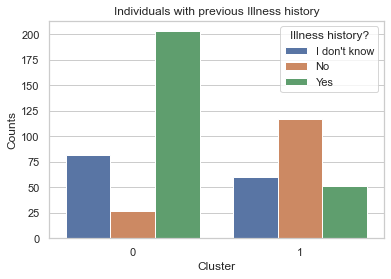

In [180]:
sns.barplot(x='Cluster', y='Counts', hue='Illness history?', data=I_h).set_title('Individuals with previous Illness history')

It is clear that Cluster 0 has a lot of individuals with Illness history. Given the fact that we can describe Cluster 0 to be individuals with a current Illness, it is not surprising.
<br>What is good to see is that when looking at the amount of individuals in Cluster 1, which can be described as individuals who does not currently have a Mental Illness, we can see that the number of individuals currently with a Mentall Illness is lower than the amount of individuals with a Mental Illness history.

### Plotting the columns : 'Live Country' and 'Work Country'
We will now take a look the amount that of our Clusters contain in terms of Live/Work Countries.

### Live Country

In [181]:
#For our column 'Live Country'
lc = (data.groupby('Cluster')['Live Country'].value_counts()).to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
lc.reset_index(inplace=True)
lc.rename(columns={'level_1':'Live Country', 'Live Country':'Counts'}, inplace=True)

#View what this dataframe now looks like.
lc

,Cluster,Live Country,Counts
0,0,United States of America,263
1,0,United Kingdom,22
2,0,Germany,8
3,0,Canada,7
4,0,Netherlands,5
5,0,France,3
6,0,Mexico,1
7,0,Portugal,1
8,0,Spain,1
9,0,Switzerland,1


Text(0.5, 1.0, 'Individual Live country count')

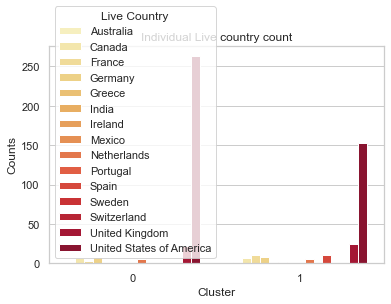

In [182]:
sns.barplot(x='Cluster', y='Counts', hue='Live Country', data=lc , palette='YlOrRd').set_title('Individual Live country count')

### Work Country

In [183]:
#For our column 'Work Country'
wc = (data.groupby('Cluster')['Work Country'].value_counts()).to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
wc.reset_index(inplace=True)
wc.rename(columns={'level_1':'Work Country', 'Work Country':'Counts'}, inplace=True)

#View what this dataframe now looks like.
wc

,Cluster,Work Country,Counts
0,0,United States of America,263
1,0,United Kingdom,22
2,0,Germany,8
3,0,Canada,7
4,0,Netherlands,5
5,0,France,3
6,0,Mexico,1
7,0,Portugal,1
8,0,Spain,1
9,0,Switzerland,1


Text(0.5, 1.0, 'Individual work country count')

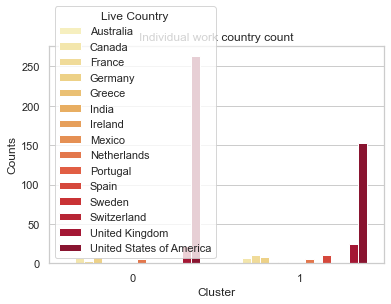

In [184]:
sns.barplot(x='Cluster', y='Counts', hue='Live Country', data=lc , palette='YlOrRd').set_title('Individual work country count')

As you might have expected, since the majority of individuals who answered this survey is from the USA and UK, respectively, their bar ranks the highest amongst them in both 'Live and Work Country'. 
<br>When looking at the values printed above each graph and looking at the graphs themselves, we can see that it is relatively evenly split between the clusters. 

Although, one interesting remark to make, is the amount of individuals in Cluster 0, who are from Eastern Europe. Intuitively, this could potentially suggest that working in or at European countries could lower the potential for having Mental health problems.

A deeper investigation into this Hypothesis could be done, returning potentially interesting results. This will however not be done in this notebook, as we have limited data of individuals from Europe.

### Finally
I want to compare the amount of mental health benefits provided by employers in all of the different countries.
<br>It is important that employers in different countries focus on providing these benefits.

In [185]:
#Obtain data on the amount of Mental health benefits provided by each country.
WC_MH_benefits = data.groupby('M-H benefits?')['Work Country'].value_counts().to_frame()

#Reset dataframe index, so that we have 3 columns, and then rename those columns
WC_MH_benefits.reset_index(inplace=True)
WC_MH_benefits.rename(columns={'level_1':'Work Country', 'Work Country':'Counts'}, inplace=True)

#View what this dataframe now looks like.
WC_MH_benefits

,M-H benefits?,Work Country,Counts
0,I don't know,United States of America,110
1,I don't know,United Kingdom,14
2,I don't know,France,8
3,I don't know,Germany,5
4,I don't know,Canada,2
5,I don't know,Netherlands,2
6,I don't know,Spain,1
7,I don't know,Australia,0
8,I don't know,India,0
9,I don't know,Ireland,0


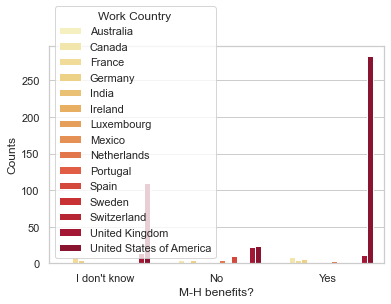

In [186]:
sns.barplot(x='M-H benefits?', y='Counts', hue='Work Country', data=WC_MH_benefits , palette='YlOrRd')
sns.set(rc={'figure.figsize':(20,12)})

With this graph it is important that we don't look at how many individuals in each country have mental health benefits or not, but instead we should focus on the entries where individuals indicated that they do not have Mental Healt benefits as well as the entries where individuals do not know.
<br>The employers of these countries should focus on providing these benefits to their employees.
<br>I think that countries should force each employer to provide these Mental Health benefits. 

For future goals, let's hope that we can change the entries from a "No" or "I don't know" into a definite "Yes".

# Summary

- In this notebook we started by importing our necessary libraries and our data.
- We then started to do some data processing and cleaning. We dropped the unnecessary columns, renamed the ones we kept and cleaned out our Null values.
- We then did some feature engineering. We change our age column to contain 9 categories. This helped is to identify specific age groups at which individuals were to have a mental illness or not.
- We then proceded to do some Feature reduction using Label and Ordinal encoders. We then selected the best amount of features based on the chi2 test.
- Then we used the K-modes algorithm and grouped our dataset into two different groups.
- To find out more abour these groups, we did some visual exploration and concluded with some very interesting findings.